Mike Cresswell: TF-IDF Tuning

In [1]:
#Mike Cresswell 
#TCSS 555
#TF IDF Tuning

import pandas as pd
import numpy as np
import itertools
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from itertools import combinations
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import requests
import os
import io

In [2]:
#Get Processed Data
url="https://raw.githubusercontent.com/mgcresswell/TCSS555-Project/main/deceptive-opinion_processed.csv"
s=requests.get(url).content
Corpus = pd.read_csv(io.StringIO(s.decode('utf-8')))

y = Corpus['deceptive']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [3]:
#Loop through different values for max_features tfidf vectorization parameter
tunningData = []    
for i in range(1, 5000, 100):
    Tfidf_vect = TfidfVectorizer(max_features=i)
    Tfidf_vect.fit(Corpus['text'])
    Text_Idf = Tfidf_vect.transform(Corpus['text'])
    tfidf_array = Text_Idf.toarray()

    split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
    for train_index, test_index in split.split(tfidf_array, y):
        Train_X, Test_X = tfidf_array[train_index], tfidf_array[test_index]
        Train_Y, Test_Y = y[train_index], y[test_index]

    SVM = svm.SVC(kernel='linear')
    SVM.fit(Train_X, Train_Y)
    y_pred = SVM.predict(Test_X)

    #add accuracy results to dataset
    row = {'mf': i, 'accuracy':accuracy_score(Test_Y, y_pred)}
    tunningData.append(row)

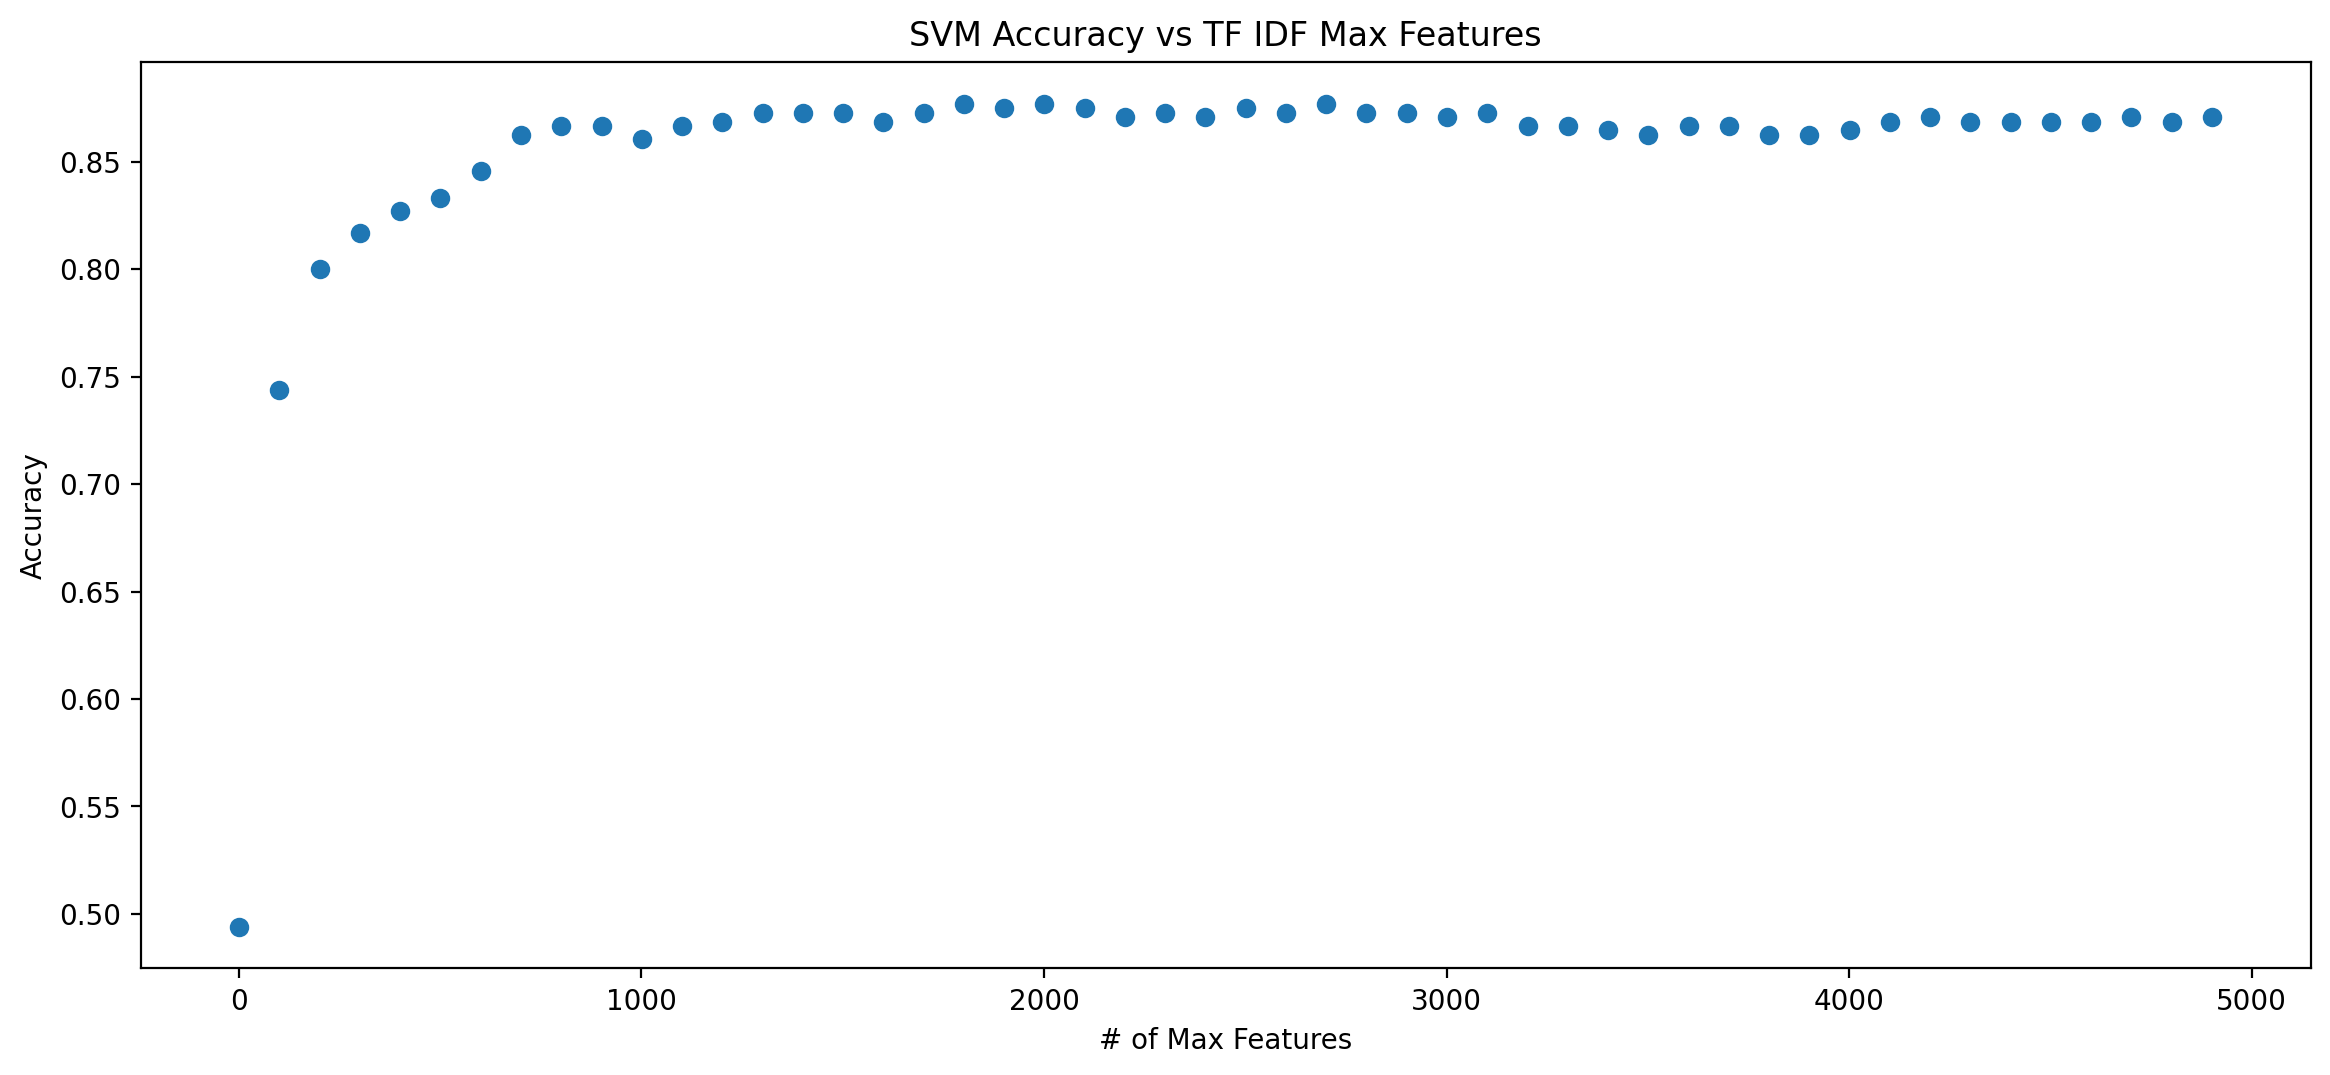

In [4]:
#export results
df = pd.DataFrame(data=tunningData, columns=['mf', 'accuracy'])
df = df.sort_values(by='accuracy', ascending=False)
df.head()

#graph results
x = df[['mf']].to_numpy().ravel() 
y = df[['accuracy']].to_numpy().ravel() 
xi = list(range(len(x)))
figure(num=None, figsize=(14, 6), dpi=200, facecolor='w', edgecolor='k')
plt.scatter(x, y)
plt.title('SVM Accuracy vs TF IDF Max Features')
plt.xlabel('# of Max Features')
plt.ylabel('Accuracy')
plt.show()